<a href="https://colab.research.google.com/github/slothengineer/DEEPLEARNING_datascience/blob/main/YOLOV5_custom_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!git clone https://github.com/ultralytics/yolov5.git
%cd yolov5


fatal: destination path 'yolov5' already exists and is not an empty directory.
/content/yolov5


In [6]:
!pip install -qr requirements.txt

import torch

from IPython.display import Image, clear_output  # to display images

# clear_output()
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

Setup complete. Using torch 2.0.1+cu118 CPU


In [8]:
%cd /content
!unzip "/content/fruitsdetector.v1i.yolov5pytorch.zip"  #we can import dataset from roboflow or add a downloaded zip file

/content
Archive:  /content/fruitsdetector.v1i.yolov5pytorch.zip
 extracting: README.dataset.txt      
 extracting: README.roboflow.txt     
 extracting: data.yaml               
   creating: test/
   creating: test/images/
 extracting: test/images/2_jpg.rf.6b5a7d72a1370feacf1ee3e82422717e.jpg  
   creating: test/labels/
 extracting: test/labels/2_jpg.rf.6b5a7d72a1370feacf1ee3e82422717e.txt  
   creating: train/
   creating: train/images/
 extracting: train/images/10_jpg.rf.f7fbd9b1bbfe0932310bede1d4da9ad4.jpg  
 extracting: train/images/5_jpg.rf.12a0aa7f6d91383d8de7c5752c82b89c.jpg  
 extracting: train/images/8_jpg.rf.04e16bccdc7aef87e5673324c4b45705.jpg  
 extracting: train/images/9_jpg.rf.5fbf43f9c5346be940c47b3bdc8494d0.jpg  
   creating: train/labels/
 extracting: train/labels/10_jpg.rf.f7fbd9b1bbfe0932310bede1d4da9ad4.txt  
 extracting: train/labels/5_jpg.rf.12a0aa7f6d91383d8de7c5752c82b89c.txt  
 extracting: train/labels/8_jpg.rf.04e16bccdc7aef87e5673324c4b45705.txt  
 extractin

In [9]:
%cat data.yaml

train: ../train/images
val: ../valid/images
test: ../test/images

nc: 2
names: ['apple', 'orange']

roboflow:
  workspace: myfirstexp
  project: fruits-detector-ctqgv
  version: 1
  license: CC BY 4.0
  url: https://universe.roboflow.com/myfirstexp/fruits-detector-ctqgv/dataset/1

In [10]:
import yaml
with open("data.yaml", 'r') as stream:
  num_classes=str(yaml.safe_load(stream)['nc'])

In [11]:
%cat /content/yolov5/models/yolov5s.yaml

# YOLOv5 🚀 by Ultralytics, AGPL-3.0 license

# Parameters
nc: 80  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [64, 6, 2, 2]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 6, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 3, C3, [1024]],
   [-1, 1, SPPF, [1024, 5]],  # 9
  ]

# YOLOv5 v6.0 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]

In [12]:
from IPython.core.magic import register_line_cell_magic

@register_line_cell_magic
def writetemplate(line,cell):
  with open(line,'w') as f:
    f.write(cell.format(**globals()))

In [13]:
%%writetemplate /content/yolov5/models/custom_yolov5s.yaml

nc: {num_classes}
depth_multiple: 0.33
width_multiple: 0.50

anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [64, 6, 2, 2]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 6, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 3, C3, [1024]],
   [-1, 1, SPPF, [1024, 5]],  # 9
  ]

# YOLOv5 v6.0 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]],  # cat backbone P3
   [-1, 3, C3, [256, False]],  # 17 (P3/8-small)

   [-1, 1, Conv, [256, 3, 2]],
   [[-1, 14], 1, Concat, [1]],  # cat head P4
   [-1, 3, C3, [512, False]],  # 20 (P4/16-medium)

   [-1, 1, Conv, [512, 3, 2]],
   [[-1, 10], 1, Concat, [1]],  # cat head P5
   [-1, 3, C3, [1024, False]],  # 23 (P5/32-large)

   [[17, 20, 23], 1, Detect, [nc, anchors]],  # Detect(P3, P4, P5)
  ]

In [14]:
%time
%cd /content/yolov5/
!python train.py --img 416 --batch 16 --epochs 10 --data '../data.yaml' --cfg ./models/custom_yolov5s.yaml --weights 'yolov5s.pt' --name yolo5s_results --cache

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 7.39 µs
/content/yolov5
train: weights=yolov5s.pt, cfg=./models/custom_yolov5s.yaml, data=../data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=10, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=yolo5s_results, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-210-gdd10481 Python-3.10.12 torch-2.0.1+cu118 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, 

In [16]:
# %reload_ext tensorboard
# %tensorboard --logdir runs

In [17]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


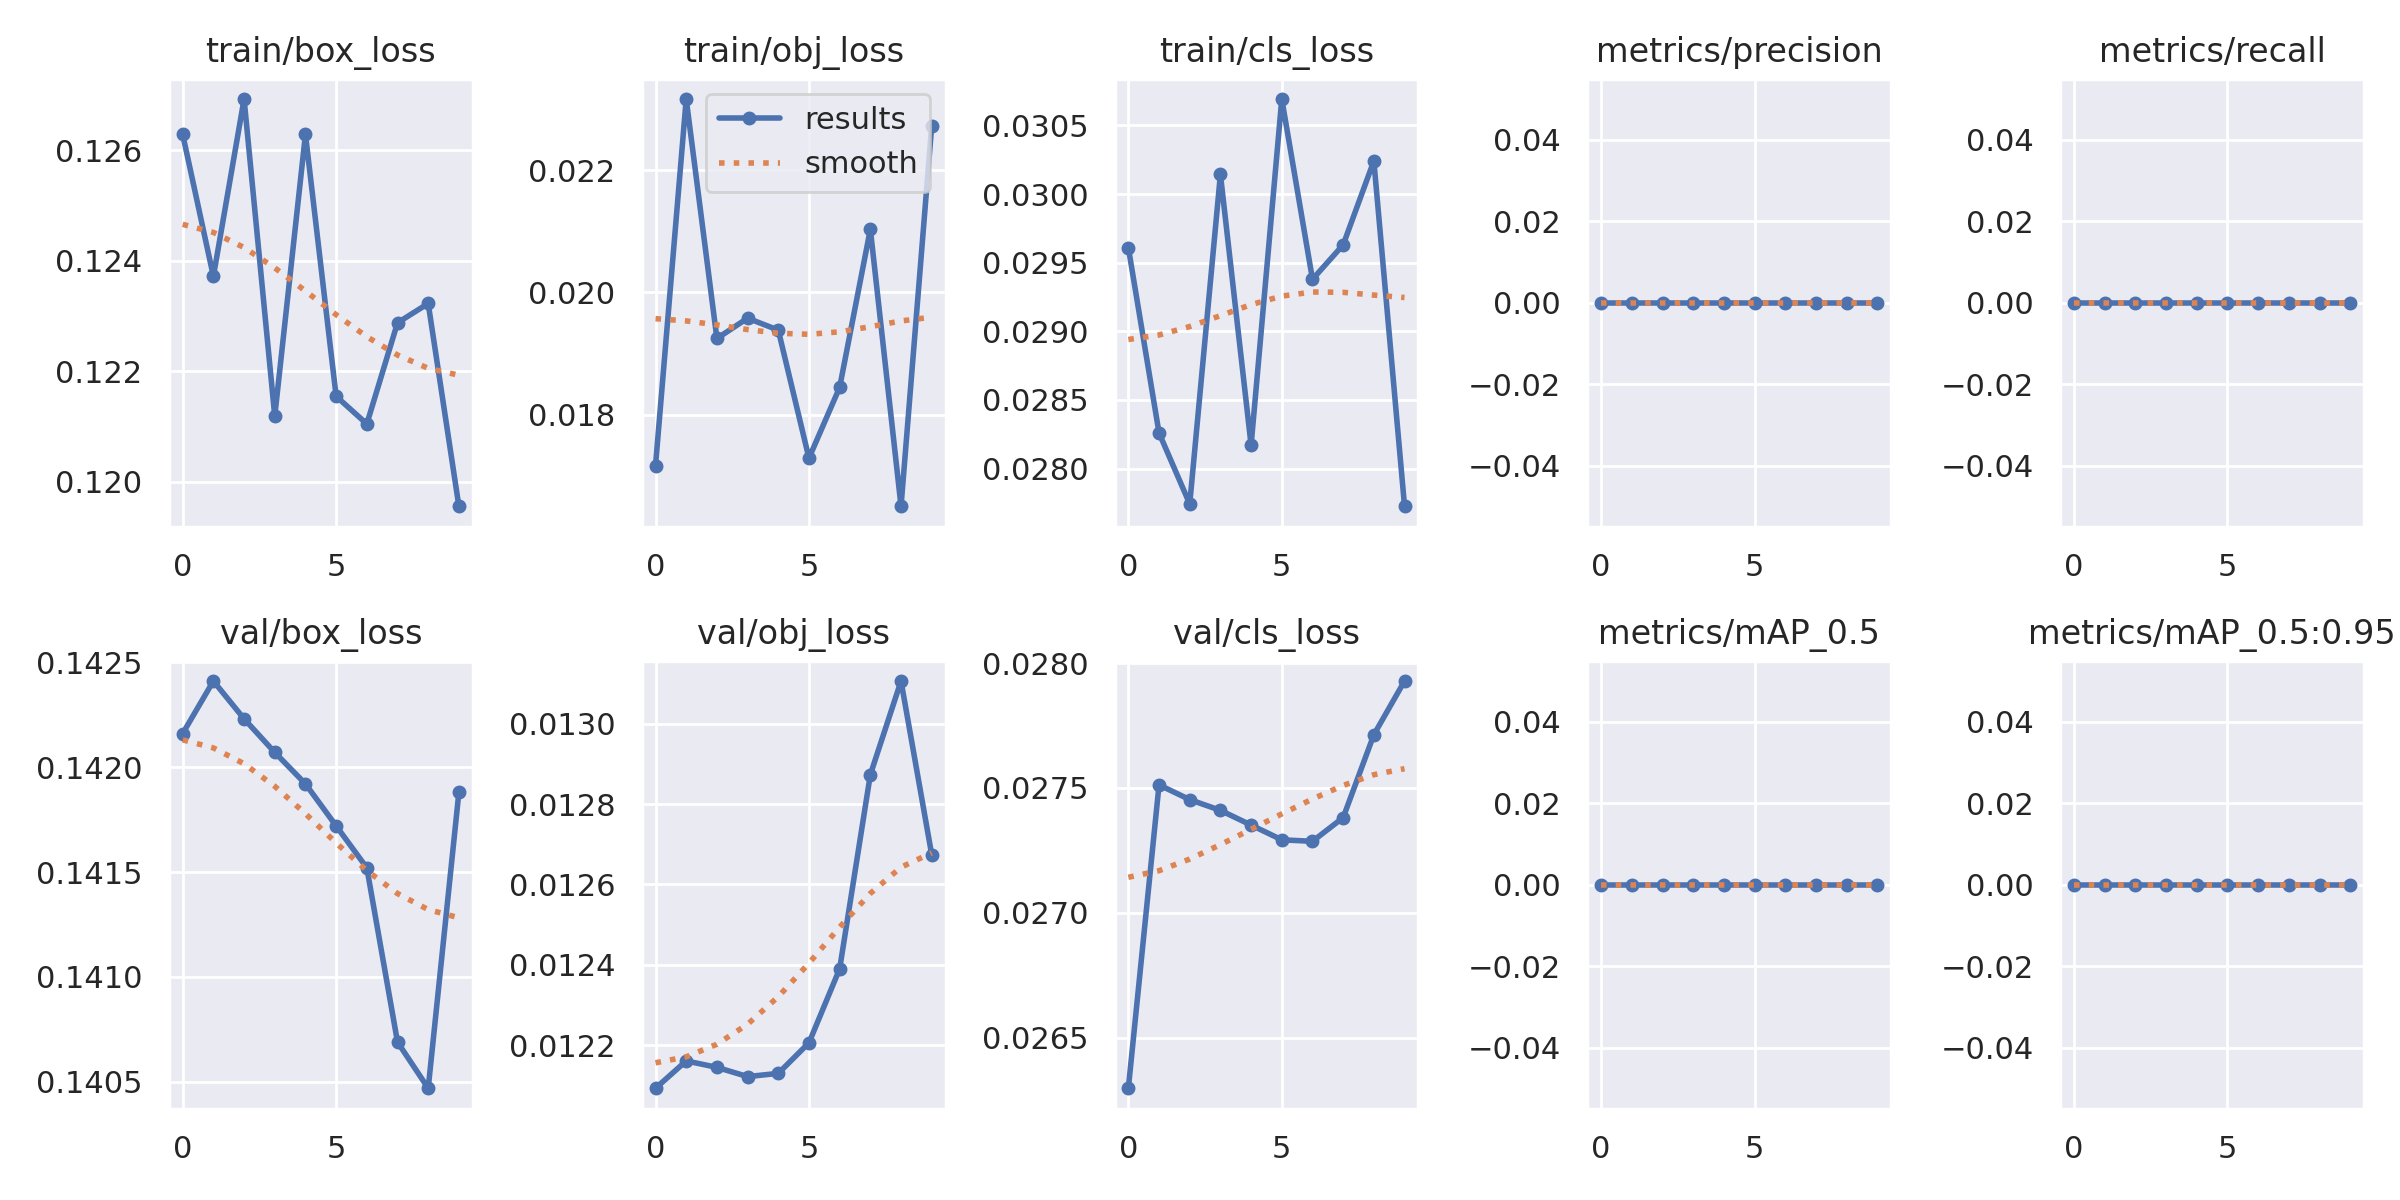

In [20]:
# we can also output some older school graphs if the tensor board isn't working for whatever reason...

from utils.plots import plot_results  # plot results.txt as results.png

Image(filename='/content/yolov5/runs/train/yolo5s_results/results.png', width=1000)  # view results.png

GROUND TRUTH TRAINING DATA:


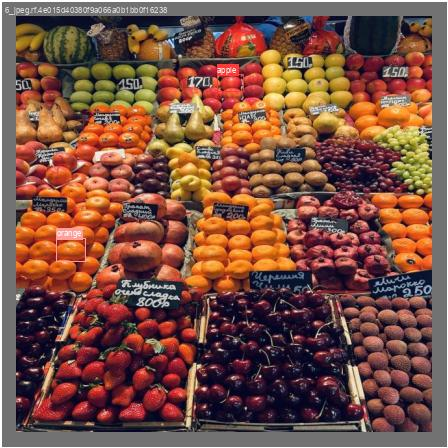

In [22]:
# first, display our ground truth data

print("GROUND TRUTH TRAINING DATA:")
Image(filename='/content/yolov5/runs/train/yolo5s_results/val_batch0_labels.jpg', width=900)

GROUND TRUTH AUGMENTED TRAINING DATA:


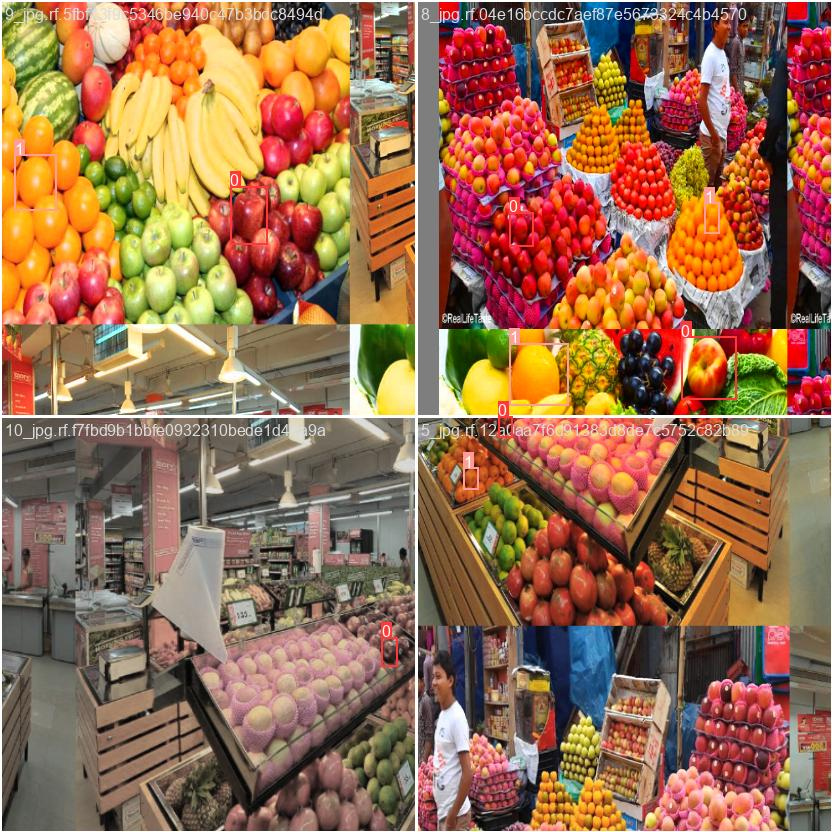

In [24]:
# print out an augmented training example
print("GROUND TRUTH AUGMENTED TRAINING DATA:")
Image(filename='/content/yolov5/runs/train/yolo5s_results/train_batch0.jpg', width=900)

In [25]:
# trained weights are saved by default in our weights folder
%ls runs/

train/


In [27]:
%ls runs/train/yolo5s_results/weights

best.pt  last.pt


In [29]:
# when we ran this, we saw .007 second inference time. That is 140 FPS on a TESLA P100!
# use the best weights!

%cd /content/yolov5/
!python detect.py --weights runs/train/yolo5s_results/weights/best.pt --img 640 --conf 0.0005 --source ../test/images

/content/yolov5
detect: weights=['runs/train/yolo5s_results/weights/best.pt'], source=../test/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.0005, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-210-gdd10481 Python-3.10.12 torch-2.0.1+cu118 CPU

Fusing layers... 
custom_YOLOv5s summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/test/images/2_jpg.rf.6b5a7d72a1370feacf1ee3e82422717e.jpg: 640x640 507 apples, 493 oranges, 440.8ms
Speed: 9.8ms pre-process, 440.8ms inference, 484.5ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp2


In [31]:
#display inference on ALL test images
#this looks much better with longer training above

#import glob
#from IPython.display import Image, display

#for imageName in glob.glob('/content/yolov5/runs/detect/exp/*.jpg'): #assuming JPG
#    display(Image(filename=imageName))
#    print("\n")

In [37]:
#Export Trained Weights for Future Inference

#from google.colab import drive
#drive.mount('/content/gdrive')

In [38]:
#%cp /content/yolov5/runs/train/yolo5s_results/weights/best.pt /content/gdrive/yolov5model/Research/SKUKeep/model